<div style="text-align:center; color:#AE2F88; font-size:60px">
Entreprises françaises par chiffre d'affaires 1995-2023
</br>
<img src="./Intro.png" style="width:900px; height:auto">
</div>

## <span style="color: #AE2F88; font-size:60px">Introduction :</span>

-  Ce projet vise à illustrer l'évolution des 10 premières entreprises françaises en termes de revenus de 1995 à 2023.
-  Le graphique animé permet de visualiser les changements dans le classement des entreprises au fil des années, en mettant en évidence les secteurs dominants. 
-  En observant ce graphique, on peut identifier les entreprises qui ont connu une croissance significative ainsi que les secteurs économiques qui ont dominé en termes de revenus au cours des dernières décennies. 
-  Cette visualisation dynamique offre une perspective claire et engageante sur l'évolution économique et sectorielle en France.

## <span style="color: #AE2F88; font-size:60px">Références :</span>

- Sources :
    - Lien vers le site Forune : <a href="https://fortune.com/ranking/global500/1995/search/?hqcountry=France">Fortune 500 </a>
    - Lien vers le dataset des top_10 sociétés française : <a href="https://github.com/SouLayman2022/France_Top10_By_Year/blob/main/France_TOP10_Companies_1995_2023.csv">France_Top10_By_Year</a>

- My-links :
    - Git_hub : <a href="https://github.com/SouLayman2022/Blood_cells_Classification.git">Repo GitHub</a>
    - linked_in : <a href="https://www.linkedin.com/in/soulayman-el-guasmi-13b890240/">Linkedin page</a>
    - Get to know me ! <a href="https://soulayman2022.github.io/Data_Scientist_Portfolio/">My Portfolio page</a>

- ## Necessary imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.animation as animation
from IPython.display import Video

- ## Loading and Preparing the Dataset

In [2]:
# Load the dataset
file_path = 'France_TOP10_Companies_1995_2023.csv'
data = pd.read_csv(file_path)

# Clean the 'Revenues ($M)' column
data['Revenues ($M)'] = data['Revenues ($M)'].str.replace(' ', '').str.replace(',', '').astype(float)

# Pivot the data
pivot_data = data.pivot(index='Year', columns='Name', values='Revenues ($M)')
pivot_data = pivot_data.fillna(0)

- ## Map Company Names to Icons

In [3]:
# Dictionary for logos
logos = {
    'Carrefour': 'Logos/Carrefour.png',
    'AXA': 'Logos/AXA.png',
    'TotalEnergies': 'Logos/TotalEnergies.png',
    'BNP Paribas': 'Logos/BNP_Paribas.png',
    'Renault': 'Logos/Renault.png',
    'Electricite de France': 'Logos/EDF.png',
    'Peugeot': 'Logos/Peugeot.png',
    'Engie': 'Logos/Engie.png',
    'Credit Agricole': 'Logos/Credit_Agricole.png',
    'Societe Generale': 'Logos/Societe_Generale.png',
    'Compagnie de Saint-Gobain': 'Logos/Compagnie_de_Saint_Gobain.png',
    'Suez': 'Logos/Suez.png',
    'Groupe Auchan': 'Logos/Groupe_Auchan.png',
    'Groupe BPCE': 'Logos/Groupe_BPCE.png',
    'Elf Aquitaine': 'Logos/Elf_Aquitaine.png',
    'Credit Agricole Group': 'Logos/Credit_Agricole.png',
    'Credit Nationale de Credit Agricole': 'Logos/Credit_Agricole.png',
    'CNP Assurances': 'Logos/CNP.png',
    'France Telecom SA': 'Logos/France_telecome.png',
    'Christian Dior': 'Logos/Christian_Dior.png',
    'GDF Suez SA': 'Logos/GDF_Suez_SA.png',
    'Veolia Environnement': 'Logos/Violia.png',
    'Total Fina Elf S.A.': 'Logos/TotalEnergies.png',
    'Vivendi Universal S.A.': 'Logos/Vivendi_uni.png',
    'Union Des Assurances de Paris': 'Logos/UAP.png',
    'Suez Lyonnaise des Eaux': 'Logos/Suez_eaux_Lyonaise.png',
    'Compagnie Generale des Eaux': 'Logos/Compagnie_Generale_des_Eaux.png',
    'Vinci': 'Logos/Vinci.png',
    'Orange': 'Logos/Orange.png',
    'Alcatel Alsthom': 'Logos/ALcatel_Alsthom.png',
    'Gan': 'Logos/Gan.png',
    'ELO Group': 'Logos/ELO.png',
    'PSA Peugeot Citroen S.A.': 'Logos/PSA.png',
    'Les Caisses d\'epargne et de Prevoyance': 'Logos/Caisse_d_epatgne.png',
    'Credit Lyonais': 'Logos/Credit_Lyonais.png'
}

- ## Adding icons to bars

In [4]:
def add_logo(ax, name, value, i):
    if name in logos:
        img = OffsetImage(plt.imread(logos[name]), zoom=0.4)
        ab = AnnotationBbox(img, (value-3000, i), frameon=False)
        ax.add_artist(ab)

- ## Create the race chart <span style="color: #e74c3c ">( what a messy code !) 🤦‍♂️🤯</span>

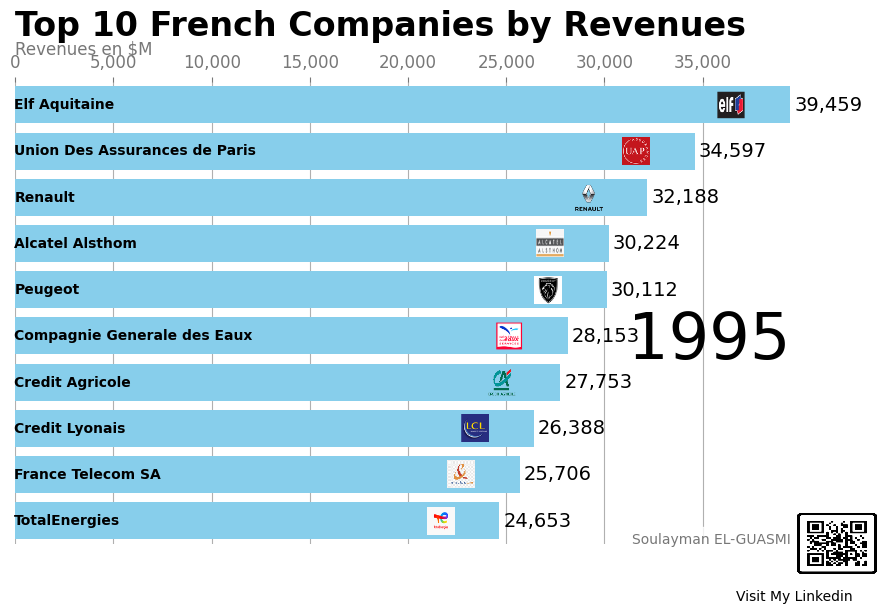

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

def draw_barchart(year):
    ax.clear()
    dff = pivot_data.loc[year].sort_values(ascending=True).tail(10)
    ax.barh(dff.index, dff.values, color='skyblue')
    dx = dff.max() / 200
    
    for i, (value, name) in enumerate(zip(dff.values, dff.index)):
        ax.text(-50, i, f'{name}', size=10, weight=600, ha='left', va='center')
        ax.text(value+dx, i, f'{value:,.0f}', size=14, ha='left', va='center')
        add_logo(ax, name, value, i)  # Add logo

    ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')
    ax.text(0, 1.06, 'Revenues en $M', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.1, 'Top 10 French Companies by Revenues',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'Soulayman EL-GUASMI', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

    # QR image and text
    img_bottom_right = OffsetImage(plt.imread('QR_frame.png'), zoom=0.08)
    ab_bottom_right = AnnotationBbox(img_bottom_right, (1.06, 0), xycoords='axes fraction', frameon=False)
    ax.add_artist(ab_bottom_right)
    ax.text(1.08, -0.1, 'Visit My Linkedin', transform=ax.transAxes, ha='right', va='top', color='black')
    plt.box(False)

# Create animation
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1995, 2024), interval=1000)

# Save animation
animator.save('race_chart.mp4')

# Display the animation in note
Video("race_chart.mp4")